# Test 2 SOM on Kepler and TESS Data

The second test done on the dataset combined with the Kepler and TESS data processed with the Min Max technique. Using the dataset by carrying out a under-sampling to balance the dataset, with all the characteristics and initializing the weights of the SOM with 50% composed of values ​​of Planets taken randomly, and 50% False Planets.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os

# Added paths to import modules
sys.path.insert(0, os.path.abspath('../'))

from sklearn.model_selection import train_test_split
from simple_som.som_grid_search import SOMGridSearch
from simple_som.som import SimpleSOM
from simple_som.visualization import View
from utils.color import Color
from utils.util import print_count_nan, plot_confusion_matrix
from utils.ditance_metrics import DistanceMetrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [2]:
X_train = pd.read_csv('../data/processed_data/X_kepler_tess.csv')
y_train = pd.read_csv('../data/processed_data/y_kepler_tess.csv')
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print_count_nan(data=X_train, name='X_train')
print_count_nan(data=y_train, name='y_train')
print('X Col', X_train.columns)
print('y Col', y_train.columns)

Shape of X_train: (13798, 18)
Shape of y_train: (13798, 2)
Number of not a numbers values in X_train: 0 out of 248364: 0.00%
Number of not a numbers values in y_train: 0 out of 27596: 0.00%
X Col Index(['Unnamed: 0', 'Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2)', 'Stellar Mass (M_Sun)',
       'Stellar Mass (M_Sun) err', 'TESS Mag'],
      dtype='object')
y Col Index(['Unnamed: 0', '0'], dtype='object')


In [3]:
X_train = X_train.drop(columns=['Unnamed: 0'])
y_train = y_train.drop(columns='Unnamed: 0')

In [4]:
print('X Col', X_train.columns)
print('y Col', y_train.columns)

X Col Index(['Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2)', 'Stellar Mass (M_Sun)',
       'Stellar Mass (M_Sun) err', 'TESS Mag'],
      dtype='object')
y Col Index(['0'], dtype='object')


In [5]:
component_names = ['Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2)', 'Stellar Mass (M_Sun)',
       'Stellar Mass (M_Sun) err', 'TESS Mag']

In [6]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=42)
X_train, y_train = under_sampler.fit_resample(X_train, y_train)
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

Shape of X_train: (10804, 17)
Shape of y_train: (10804, 1)


In [7]:
X_train = X_train.values
y_train = y_train.values

In [8]:
TESTSET_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=TESTSET_SIZE, 
                                                    random_state=RANDOM_STATE, shuffle=True,
                                                    stratify=None)
print("Number of X_train: ", X_train.shape[0])
print("Number of X_test: ", X_test.shape[0])
print("Number of features: ", X_train.shape[1])

Number of X_train:  8643
Number of X_test:  2161
Number of features:  17


# Grid Search

In [28]:
param_grid = {
    'W': [None],
    'max_iter': [14000],
    'num_rows': [20],
    'num_cols': [20],
    'max_learning_rate': [0.8],
    'max_distance': [6, 10],
    'distance_bmu': [DistanceMetrics.euclidean_distance, DistanceMetrics.manhattan_distance],
    'distance_nr': [DistanceMetrics.euclidean_distance, DistanceMetrics.manhattan_distance],
    'W_PLANET': [0.9, 1],
    'W_FALSE_PLANET': [1, 1.1],
    'K': [3, 5, 7, 11]
}

In [29]:
grid_search = SOMGridSearch(param_grid=param_grid, n_jobs=-1)
best_param, best_score = grid_search.fit(X_train, y_train, X_test, y_test)

print("Best param:", best_param)
print("Best accuracy:", best_score)
#################################################################################
# Best param: {'W': None, 'max_iter': 14000, 'num_rows': 20, 'num_cols': 20,
# 'max_learning_rate': 0.8, 'max_distance': 6,
# 'distance_bmu': <function DistanceMetrics.euclidean_distance at 0x2b73046478b0>,
# 'distance_nr': <function DistanceMetrics.manhattan_distance at 0x2b7304647940>,
# 'W_PLANET': 0.9, 'W_FALSE_PLANET': 1, 'K': 11}
# Best accuracy: 0.7662817551963048

Fitting 1 folds for each of 128 candidates, totalling 128 fits


SOM training completed:  14000  | QE:    0.000003  | LR:    0.000057  | NR:    1.000000  | Time:   71.727306
SOM training completed:  14000  | QE:    0.000003  | LR:    0.000057  | NR:    1.000000  | Time:   72.597965
SOM training completed:  14000  | QE:    0.000003  | LR:    0.000057  | NR:    1.000000  | Time:   73.547914
SOM training completed:  14000  | QE:    0.000003  | LR:    0.000057  | NR:    1.000000  | Time:   76.224597
SOM training completed:  14000  | QE:    0.000002  | LR:    0.000057  | NR:    1.000000  | Time:   88.639082
SOM training completed:  14000  | QE:    0.000002  | LR:    0.000057  | NR:    1.000000  | Time:   89.651944
SOM training completed:  14000  | QE:    0.000002  | LR:    0.000057  | NR:    1.000000  | Time:   89.990997
SOM training completed:  14000  | QE:    0.000002  | LR:    0.000057  | NR:    1.000000  | Time:   90.008798
SOM training completed:  14000  | QE:    0.000002  | LR:    0.000057  | NR:    1.000000  | Time:   90.721676
SOM training comple

In [9]:
# best_param = {}
# best_param['W'] = None
# best_param['max_iter'] = 14000
# best_param['num_rows'] = 20
# best_param['num_cols'] = 20
# best_param['max_learning_rate'] = 0.8
# best_param['max_distance'] = 5
# best_param['distance_bmu'] = DistanceMetrics.euclidean_distance
# best_param['distance_nr'] = DistanceMetrics.euclidean_distance
# best_param['W_PLANET'] = 1
# best_param['W_FALSE_PLANET'] = 1
# best_param['K'] = 5

In [10]:
W = best_param['W']
max_iter = best_param['max_iter']
num_rows = best_param['num_rows']
num_cols = best_param['num_cols']
max_learning_rate = best_param['max_learning_rate']
max_distance = best_param['max_distance']
distance_bmu = best_param['distance_bmu']
distance_nr = best_param['distance_nr']
w_planet = best_param['W_PLANET']
w_false_planet = best_param['W_FALSE_PLANET']
K = best_param['K']

In [11]:
som = SimpleSOM(X_train=X_train, y_train=y_train, W=None, max_iter=max_iter, 
                num_rows=num_rows, num_cols=num_cols, max_learning_rate=max_learning_rate,
                max_distance=max_distance, distance_bmu=distance_bmu, distance_nr=distance_nr, 
                W_PLANET=w_planet, W_FALSE_PLANET=w_false_planet, K=K, n_jobs=-1)
params = som.fit(X_data=X_train, verbose=2)

Iteration:  00001  | QE:    0.000003  | LR:    0.800000  | NR:    5.000000  | Time:    0.009087
Iteration:  01000  | QE:    0.000007  | LR:    0.742914  | NR:    5.000000  | Time:    4.350424
Iteration:  02000  | QE:    0.000019  | LR:    0.685771  | NR:    5.000000  | Time:    4.222631
Iteration:  03000  | QE:    0.000005  | LR:    0.628629  | NR:    4.000000  | Time:    4.477262
Iteration:  04000  | QE:    0.000006  | LR:    0.571486  | NR:    4.000000  | Time:    4.311562
Iteration:  05000  | QE:    0.000005  | LR:    0.514343  | NR:    4.000000  | Time:    4.643917
Iteration:  06000  | QE:    0.000008  | LR:    0.457200  | NR:    3.000000  | Time:    4.500866
Iteration:  07000  | QE:    0.000004  | LR:    0.400057  | NR:    3.000000  | Time:    4.725218
Iteration:  08000  | QE:    0.000002  | LR:    0.342914  | NR:    3.000000  | Time:    4.478693
Iteration:  09000  | QE:    0.000003  | LR:    0.285771  | NR:    2.000000  | Time:    4.492998
Iteration:  10000  | QE:    0.000007  | 

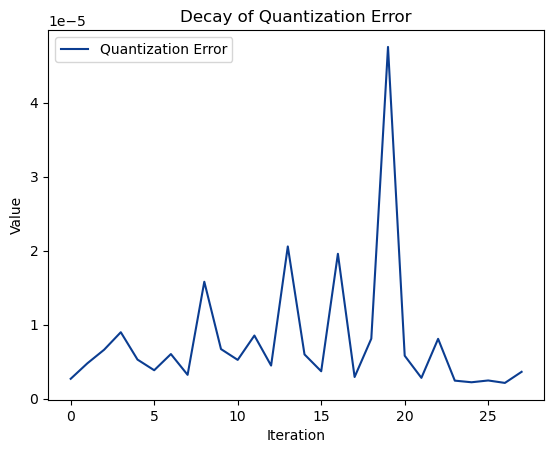

In [12]:
REDUCE = 500
plt.plot(range(max_iter//REDUCE), params['errors'][::REDUCE], 
         label='Quantization Error', color=Color.SEA.value)
plt.title('Decay of Quantization Error')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

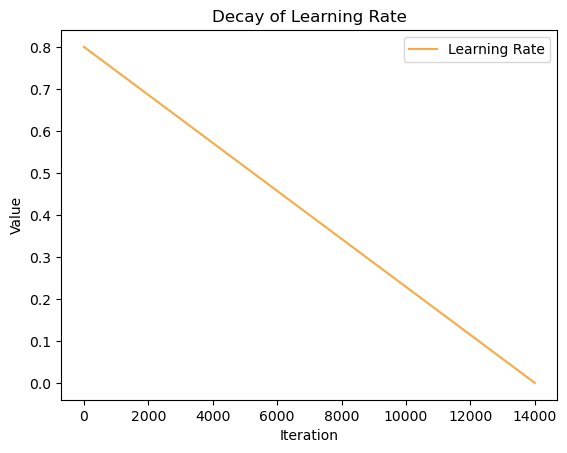

In [34]:
plt.plot(range(max_iter), params['lr'], label='Learning Rate', color=Color.SUN.value)
plt.title('Decay of Learning Rate')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

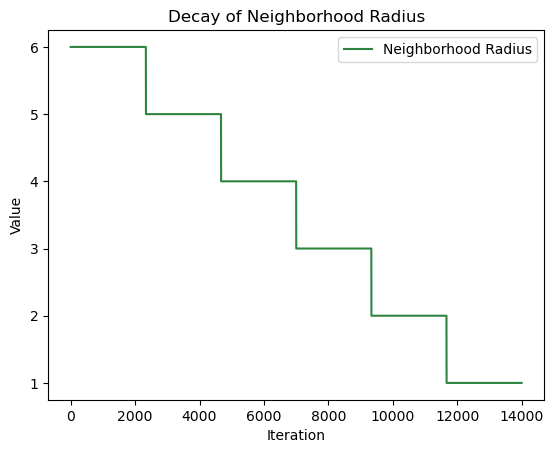

In [35]:
plt.plot(range(max_iter), params['nr'], label='Neighborhood Radius', color=Color.EARTH.value)
plt.title('Decay of Neighborhood Radius')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

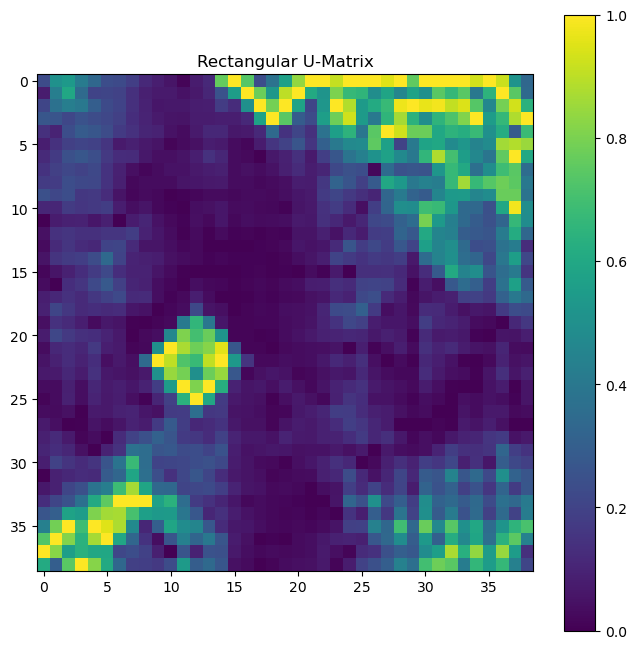

In [13]:
u_matrix_rect = View.make_u_rect(som=som)
plt.figure(figsize=(8, 8))
plt.imshow(u_matrix_rect, cmap='viridis', interpolation='none')
plt.title('Rectangular U-Matrix')
plt.colorbar()
plt.show()

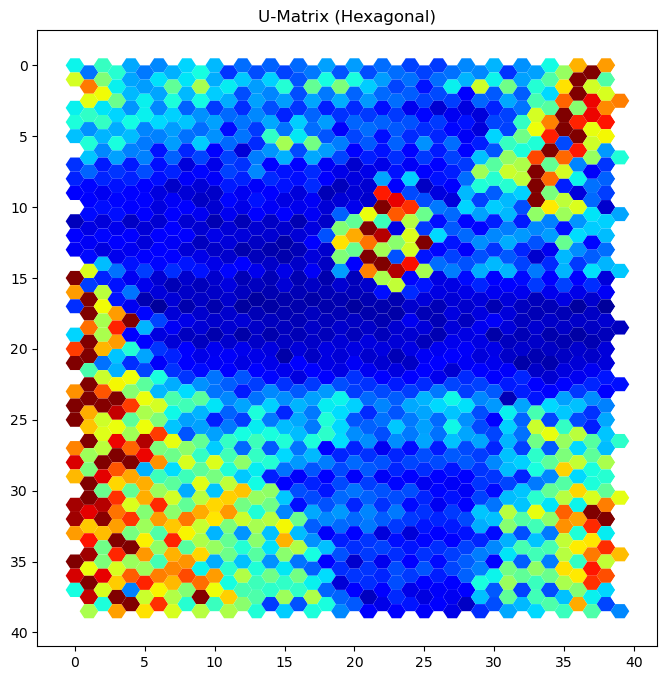

In [14]:
u_matrix_hex = View.make_u_hex(som=som)
fig, ax = plt.subplots(figsize=(8,8))
View.draw_hex_grid(som, ax, u_matrix_hex)
plt.show()

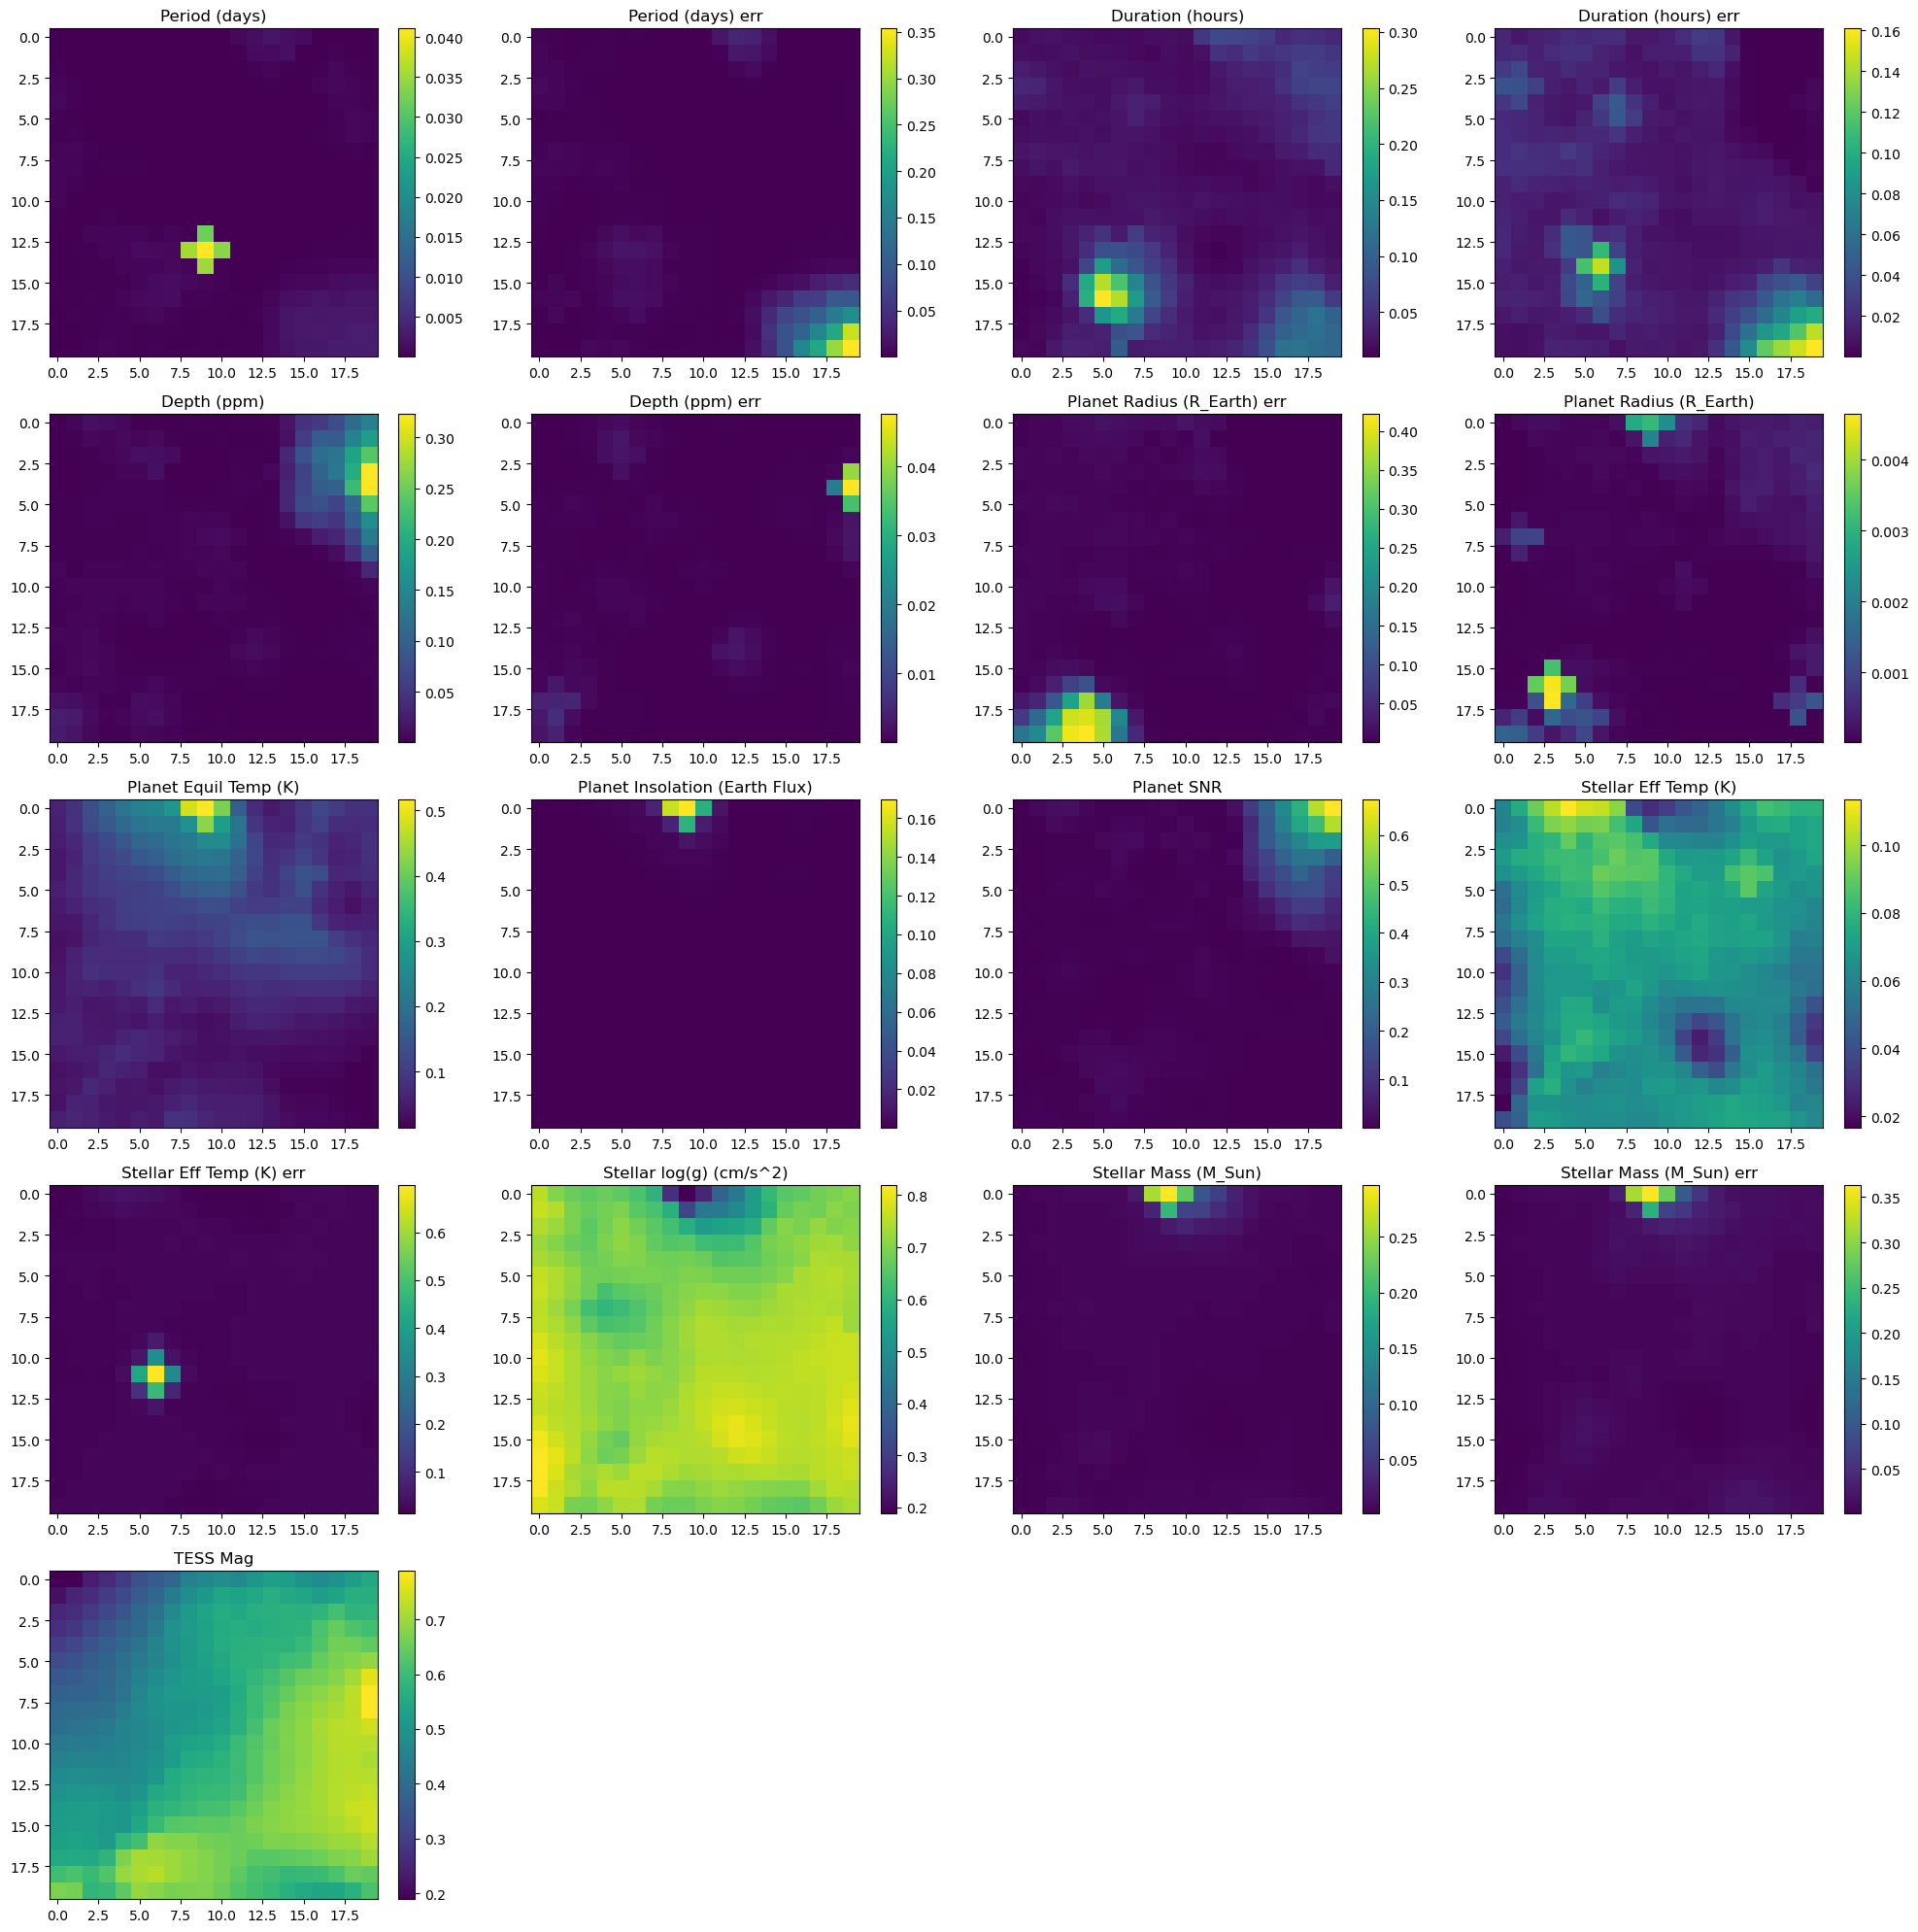

In [15]:
fig = plt.figure(figsize=(20, 20))
View.make_u_slide(component_names=component_names, som=som)
plt.show()

In [16]:
BMUs, BMU_labels = som.calculate_bmu_and_labels()
BMU_label_combinations = list(zip(BMUs, BMU_labels))
BMU_counts = som.bmu_occurrences()
coord_label = som.compute_coordinates_label()
som.print_bmu_label()

(2, 19) -> Planet:   0, False Planet:  26
(9, 16) -> Planet:   0, False Planet:  33
(9, 0)  -> Planet:  30, False Planet:   0
(6, 1)  -> Planet:  47, False Planet:   0
(18, 8) -> Planet:  20, False Planet:   0
(0, 15) -> Planet:   0, False Planet:  18
(5, 17) -> Planet:   0, False Planet:  34
(18, 11)-> Planet:  33, False Planet:   0
(9, 15) -> Planet:   0, False Planet:  26
(6, 10) -> Planet:   8, False Planet:   0
(15, 5) -> Planet:   0, False Planet:  17
(7, 2)  -> Planet:   0, False Planet:  34
(14, 15)-> Planet:  39, False Planet:   0
(0, 14) -> Planet:   0, False Planet:   9
(3, 3)  -> Planet:   0, False Planet:  36
(19, 15)-> Planet:   0, False Planet:  28
(19, 14)-> Planet:   0, False Planet:  23
(7, 10) -> Planet:  29, False Planet:   0
(5, 7)  -> Planet:   7, False Planet:   0
(12, 1) -> Planet:  19, False Planet:   0
(12, 14)-> Planet:  44, False Planet:   0
(18, 6) -> Planet:   0, False Planet:   9
(9, 2)  -> Planet:  32, False Planet:   0
(5, 0)  -> Planet:  46, False Plan

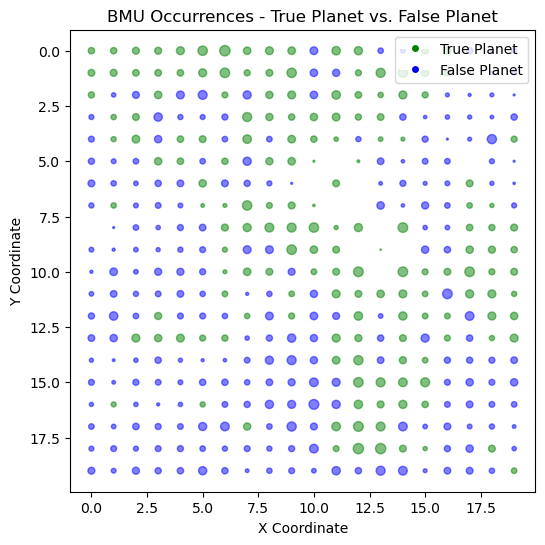

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))
View.plot_bmu_occurrences_with_planet_noplanet(ax=ax, coord_label=coord_label)
plt.show()

In [18]:
map = som.collecting_labels(X_train, y_train)
label_map = som.construct_label_map(X_train, y_train)
label_map_kw = som.construct_label_map_weighed(X_train, y_train)
label_map_kcw = som.construct_label_map_occ_weighed(X_train, y_train)

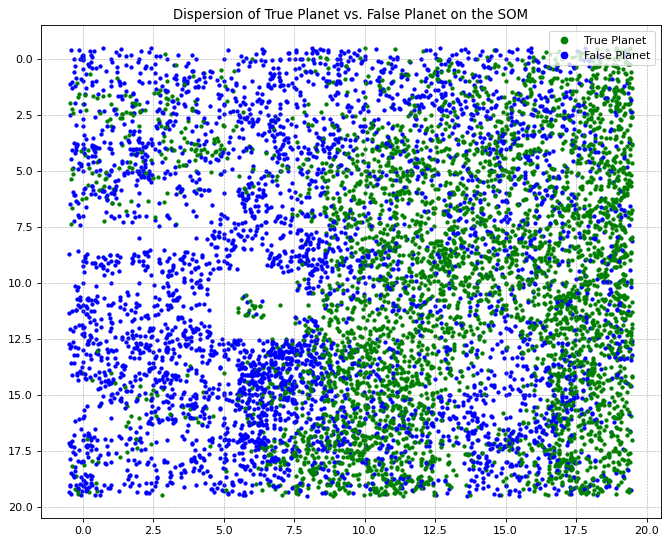

In [43]:
View.plot_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, BMU_labels=BMU_labels)

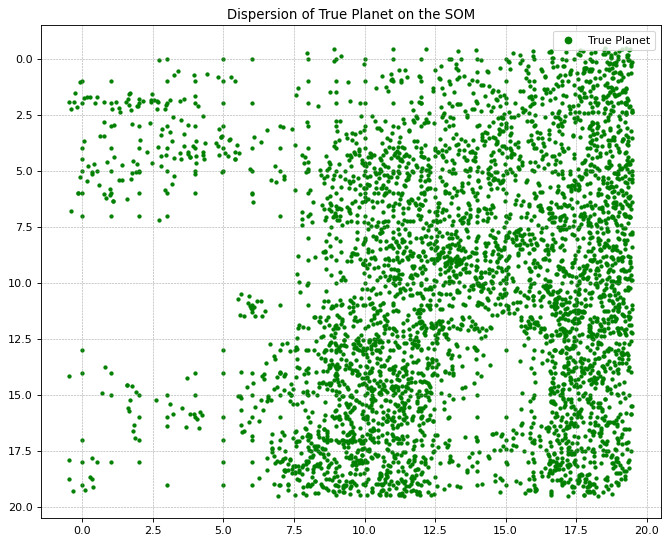

In [44]:
View.plot_class_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, 
                                              BMU_labels=BMU_labels, classes=1)

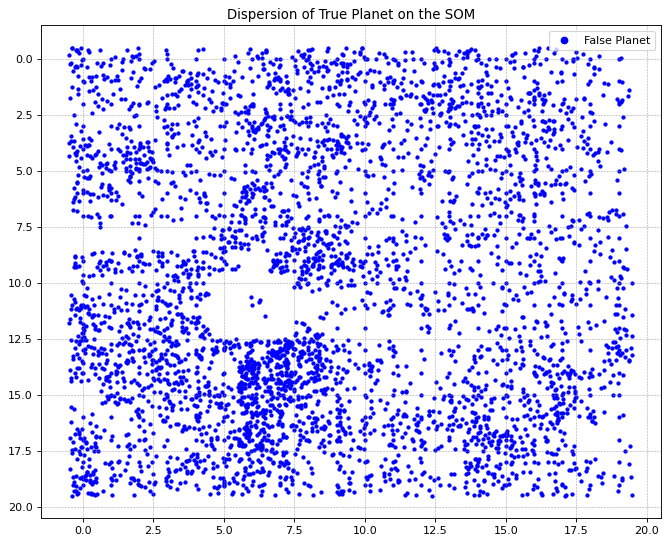

In [45]:
View.plot_class_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, 
                                              BMU_labels=BMU_labels, classes=0)

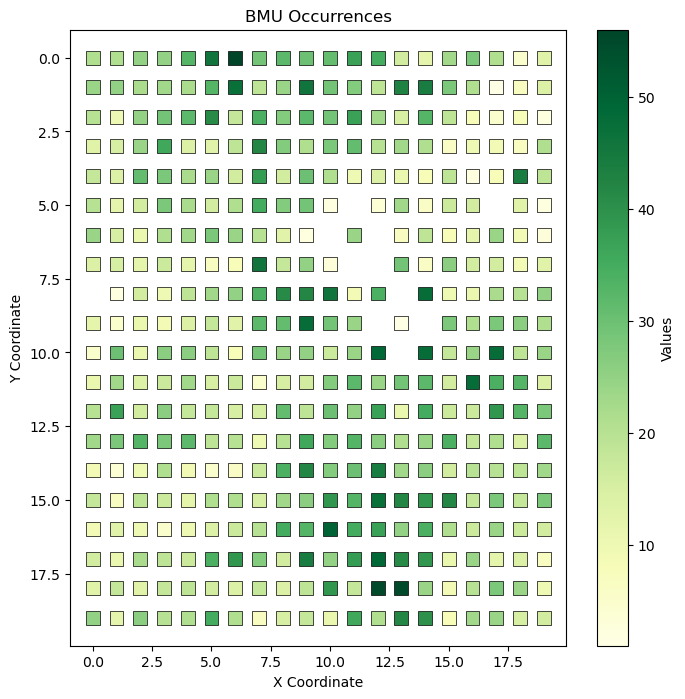

In [19]:
x_coords, y_coords, counts_occ = som.compute_occurrences_plot()

plt.figure(figsize=(8, 8))
sc = plt.scatter(x_coords, y_coords, c=counts_occ, cmap='YlGn', 
                 s=100, marker='s', edgecolors='black', linewidths=0.5)
plt.colorbar(sc, label='Values')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('BMU Occurrences')
plt.gca().invert_yaxis()
plt.show()

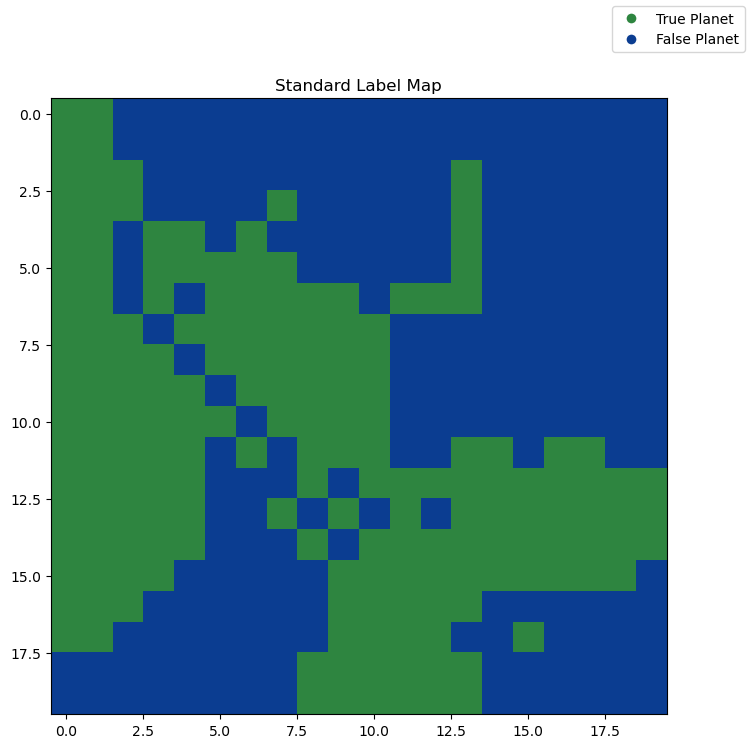

In [20]:
title = ('Standard Label Map')
View.plot_label_map(label_map=label_map, title=title)

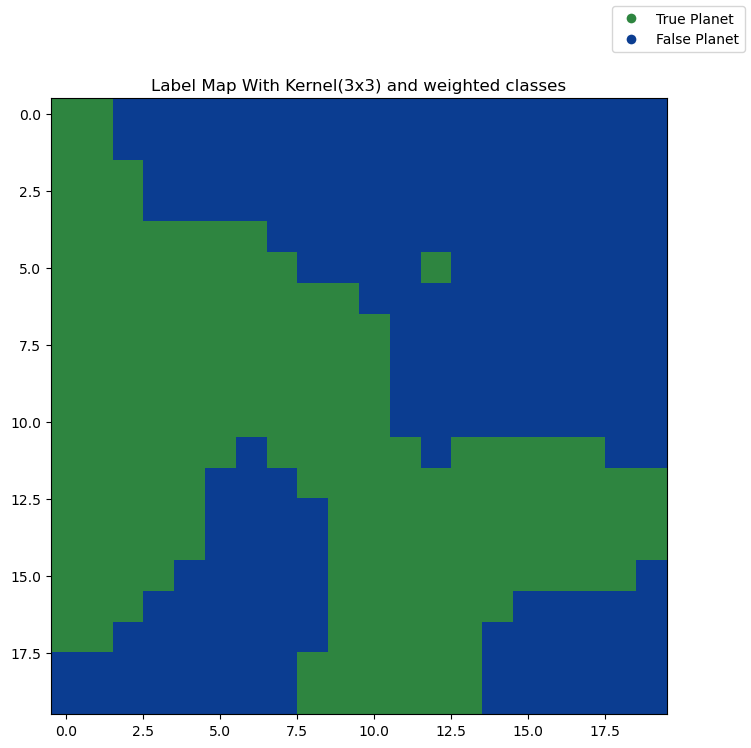

In [21]:
title = ('Label Map With Kernel(3x3) and weighted classes')
View.plot_label_map(label_map=label_map_kw, title=title)

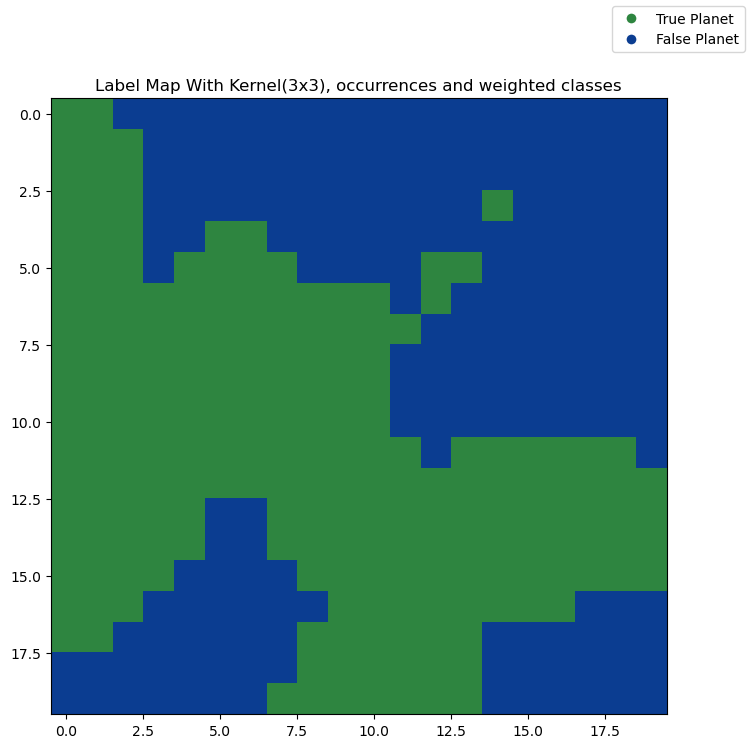

In [22]:
title = ('Label Map With Kernel(3x3), occurrences and weighted classes')
View.plot_label_map(label_map=label_map_kcw, title=title)

Accuracy: 0.7501156871818603
F1-score: 0.7610619469026548
Precision: 0.7184628237259816
Recall: 0.8090310442144873
cm:  [[761 337]
 [203 860]]


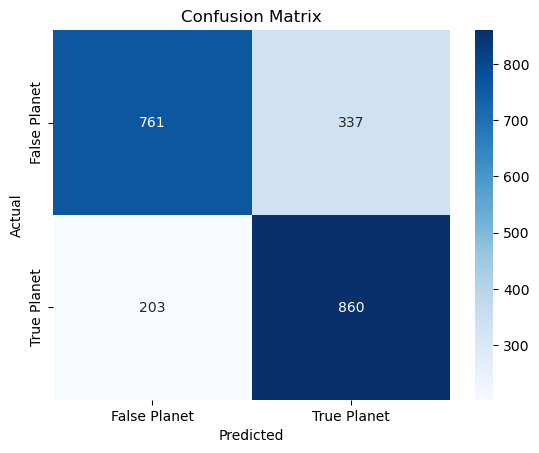

In [23]:
predicted = som.predict(X_train=X_train, y_train=y_train, X_test=X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

Accuracy: 0.7561314206385933
F1-score: 0.7677390921110622
Precision: 0.7222222222222222
Recall: 0.819379115710254
cm:  [[763 335]
 [192 871]]


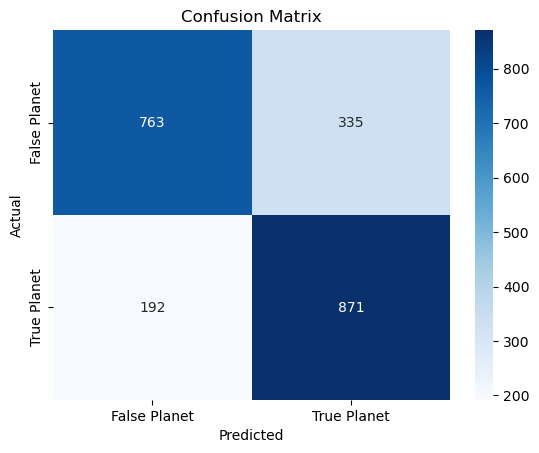

In [24]:
predicted = som.predict_kw(X_train, y_train, X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

Accuracy: 0.7501156871818603
F1-score: 0.7696245733788396
Precision: 0.7041373926619828
Recall: 0.8485418626528692
cm:  [[719 379]
 [161 902]]


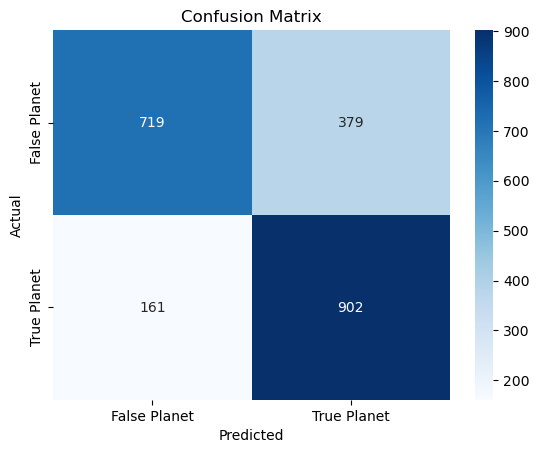

In [25]:
predicted = som.predict_kcw(X_train, y_train, X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

Accuracy: 0.7515039333641832
F1-score: 0.7670281995661606
Precision: 0.711755233494364
Recall: 0.8316086547507056
cm:  [[740 358]
 [179 884]]


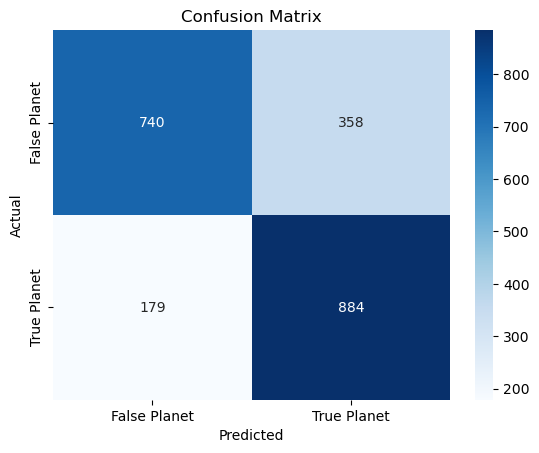

In [26]:
predicted = som.predict_knn(X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)